In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('../data/Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape

(30, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [8]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


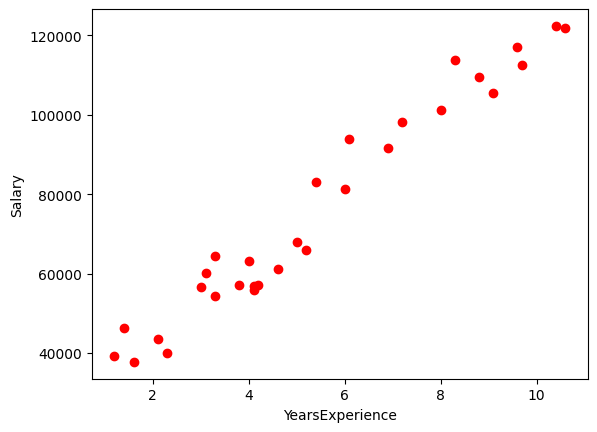

In [9]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color='red',)

In [10]:
X = df['YearsExperience']
Y = df['Salary']

In [11]:
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.predict([[2.0]])

/home/surendar/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[43118.92850357]])

In [15]:
model.coef_

array([[9554.2662031]])

In [16]:
model.intercept_

array([24010.39609738])

In [17]:
#y=mx+b
y=9554.2662031*2+24010.39609738
y

43118.92850358

In [18]:
predict=model.predict(x_test)
predict

array([[39297.22202233],
       [75603.43359409],
       [37386.36878171],
       [60316.60766914],
       [63182.88753007],
       [52673.19470666]])

In [19]:
#Checking Accuracy Score:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [20]:
mse= mean_squared_error(y_test,predict)
mse

36064238.493955195

In [21]:
r2_score(y_test,predict)

0.8143022783109011

In [22]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, predict)
mae

5392.453356511894

In [23]:
model.predict([[1.8]])

/home/surendar/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41208.07526295]])

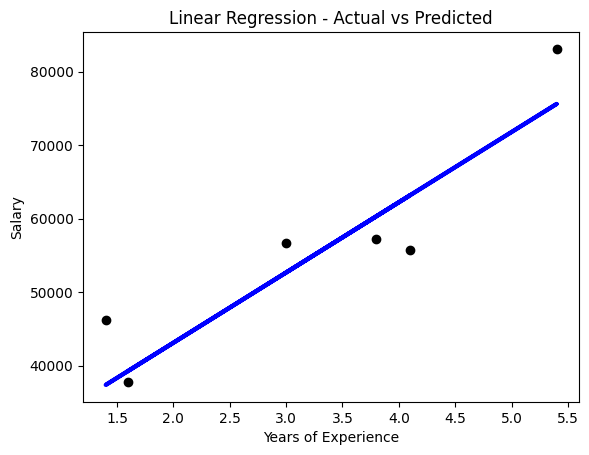

In [24]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, predict, color='blue', linewidth=3)
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


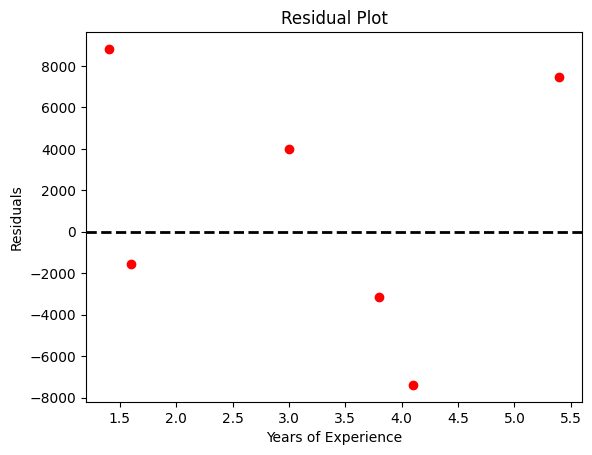

In [25]:
residuals = y_test - predict
plt.scatter(x_test, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.show()


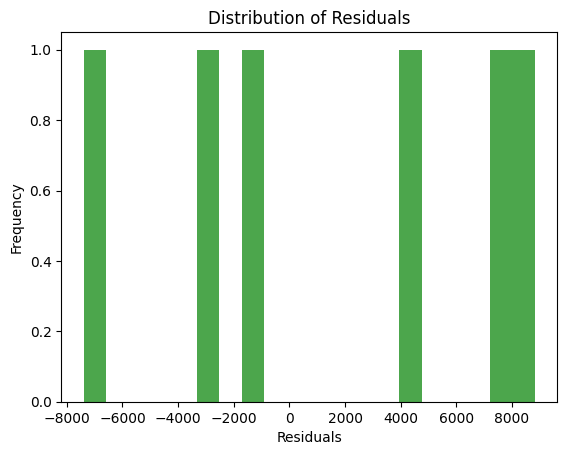

In [26]:
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



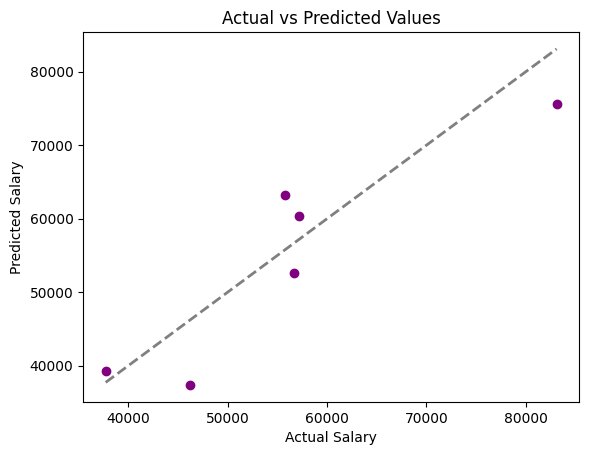

In [27]:
plt.scatter(y_test, predict, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='gray', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()
